<a href="https://colab.research.google.com/github/Sizwe100/Python-Random-Forest/blob/main/SPI_for_LaChagra_Farm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
uploaded = files.upload()

Saving MonthlyRemoteSensingData3_Mtuba.csv to MonthlyRemoteSensingData3_Mtuba.csv


In [4]:
# Assuming you've already loaded your DataFrame (df) from a CSV file because data is separated by semicolon and not "," as expected
df = pd.read_csv('MonthlyRemoteSensingData3_Mtuba.csv', sep=';')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     58 non-null     object 
 1   SAVI     58 non-null     float64
 2   MSAVI    58 non-null     float64
 3   NDVI     58 non-null     float64
 4   EVI      58 non-null     float64
 5   RF       58 non-null     float64
 6   ET       58 non-null     float64
 7   SPEI3    58 non-null     float64
 8   SPI3     58 non-null     float64
 9   VCI      58 non-null     float64
 10  Nino3.4  58 non-null     float64
 11  DMI      58 non-null     float64
dtypes: float64(11), object(1)
memory usage: 5.6+ KB


In [8]:
df.info()  # Use this to check the column names in your DataFrame

# Assuming the CSV has 'Year' and 'ENSO_Index' columns
df = pd.read_csv(list(uploaded.keys())[0]) # This line might be causing the error
# print(df.head()) # Use this to confirm the data

# Assuming the CSV has 'Year' and 'ENSO_Index' columns
df = pd.read_csv(list(uploaded.keys())[0]) # This line might be causing the error
print(df.head()) # Use this to confirm the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     58 non-null     object 
 1   SAVI     58 non-null     float64
 2   MSAVI    58 non-null     float64
 3   NDVI     58 non-null     float64
 4   EVI      58 non-null     float64
 5   RF       58 non-null     float64
 6   ET       58 non-null     float64
 7   SPEI3    58 non-null     float64
 8   SPI3     58 non-null     float64
 9   VCI      58 non-null     float64
 10  Nino3.4  58 non-null     float64
 11  DMI      58 non-null     float64
dtypes: float64(11), object(1)
memory usage: 5.6+ KB
  date;SAVI;MSAVI;NDVI;EVI;RF;ET;SPEI3;SPI3;VCI;Nino3.4;DMI
0  2019/03/31;0.39508;0.37954;0.61456;0.59602;5.5...       
1  2019/04/30;0.3509;0.3272333333333333;0.5807666...       
2  2019/05/31;0.31345;0.2881;0.52416;0.5117;0.212...       
3  2019/06/30;0.2867888888888889;0.25918888888888...       
4  2019/07/3

In [9]:

# Assuming you've already loaded your DataFrame (df) from a CSV file because data is separated by semicolon and not "," as expected
# This was replaced with your uploaded file for testing
#df = pd.read_csv('MonthlyRemoteSensingData3_Mtuba.csv', sep=';')
df = pd.read_csv(list(uploaded.keys())[0], sep=';') # use uploaded file and use ; as separator
df.info()
# Assuming the CSV has 'date' and 'Nino3.4' columns
# These next two lines were removed to prevent overwriting the DataFrame.
#df = pd.read_csv(list(uploaded.keys())[0]) # This line might be causing the error
#print(df.head()) # Use this to confirm the data
# Check if 'date' column exists, if not, check df.columns for the correct column name
if 'date' in df.columns:
    years = df['date']
else:
    print(f"Column 'date' not found. Available columns: {df.columns}")
    # Replace 'correct_column_name' with the actual column containing the years
   # date = df['date']
# Check if 'Nino3.4' is present in the columns
if 'SPI3' in df.columns:
    enso_indices = df['SPI3']
else:
    print(f"Column 'SPI3' not found. Available columns: {df.columns}")
    # If not found, you'll need to correct the column name or find an alternative
    # For demonstration, let's assume 'ENSO_Index' is the correct name:
    # enso_indices = df['ENSO_Index']
# ... rest of your plotting code ...

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     58 non-null     object 
 1   SAVI     58 non-null     float64
 2   MSAVI    58 non-null     float64
 3   NDVI     58 non-null     float64
 4   EVI      58 non-null     float64
 5   RF       58 non-null     float64
 6   ET       58 non-null     float64
 7   SPEI3    58 non-null     float64
 8   SPI3     58 non-null     float64
 9   VCI      58 non-null     float64
 10  Nino3.4  58 non-null     float64
 11  DMI      58 non-null     float64
dtypes: float64(11), object(1)
memory usage: 5.6+ KB


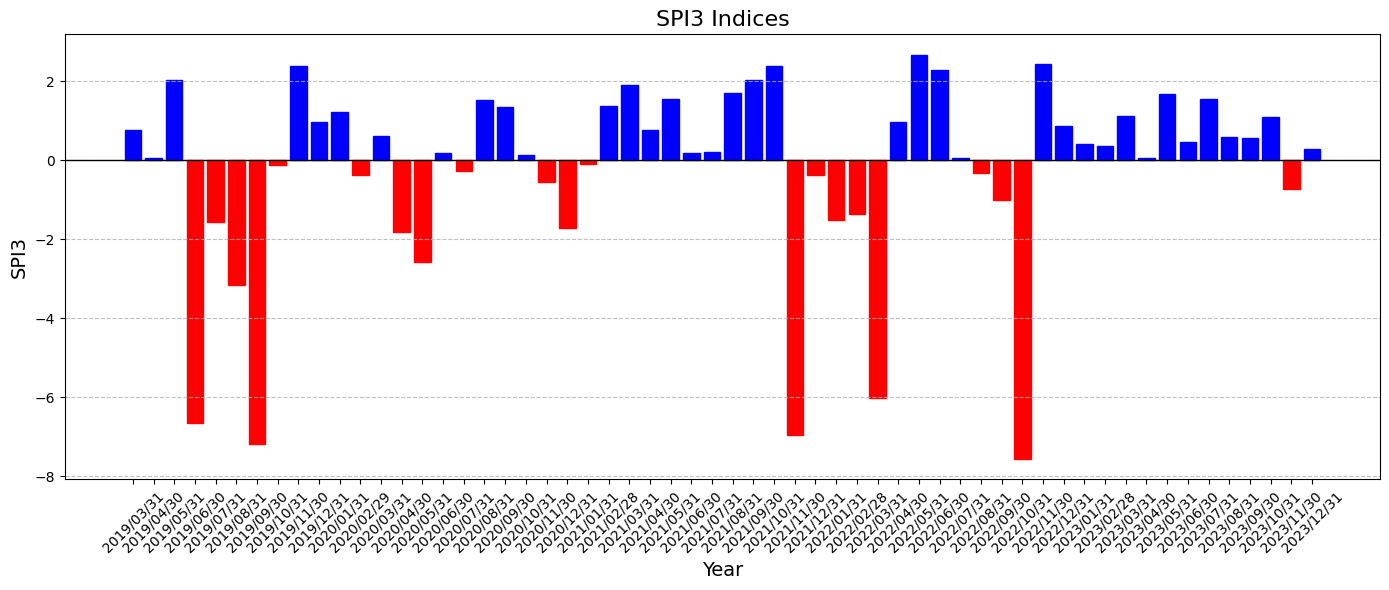

In [7]:
# Create the plot
plt.figure(figsize=(14, 6))
bars = plt.bar(years, enso_indices, color='blue', edgecolor='black')

# Customize colors based on values (red for negative, blue for positive)
for bar in bars:
    if bar.get_height() < 0:  # Check for negative values
        bar.set_color('red')  # Set color to red for negative values
    else:
        bar.set_color('blue')  # Set color to blue for positive values

# Add labels, title, and grid
plt.axhline(0, color='black', linewidth=1)  # Add horizontal line at 0
plt.title('SPI3 Indices', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('SPI3', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.8)

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


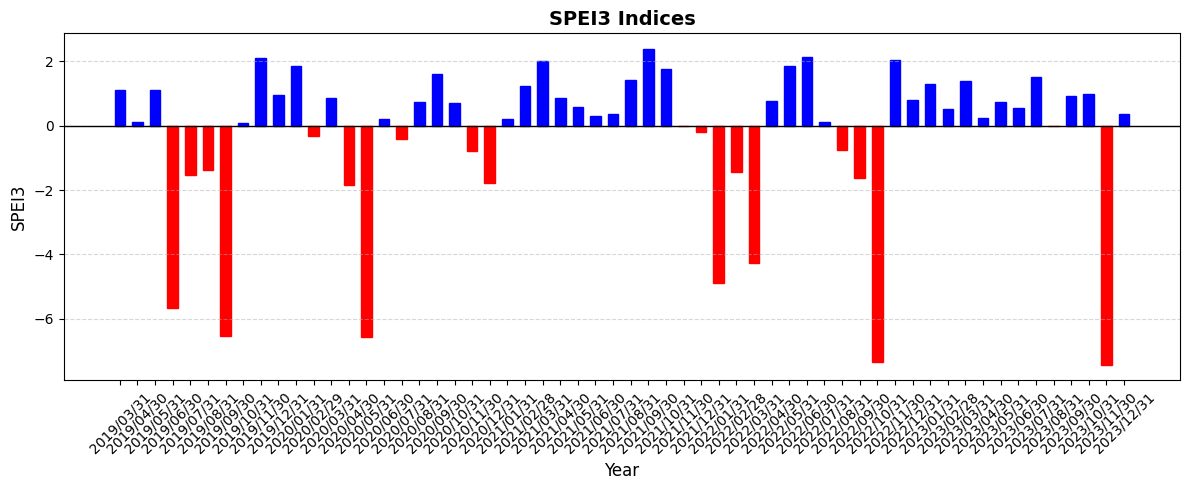

In [ ]:
# Create the plot
plt.figure(figsize=(12, 5))  # Adjust figure size for a more compact layout
bar_width = 0.6  # Set a smaller width for the bars
bars = plt.bar(years, enso_indices, color='blue', edgecolor='black', width=bar_width)

# Customize colors based on values (red for negative, blue for positive)
for bar in bars:
    if bar.get_height() < 0:  # Check for negative values
        bar.set_color('red')  # Set color to red for negative values
    else:
        bar.set_color('blue')  # Set color to blue for positive values

# Add labels, title, and grid
plt.axhline(0, color='black', linewidth=1)  # Add horizontal line at 0
plt.title('SPEI3 Indices', fontsize=14, weight='bold')  # Smaller title font, bold for emphasis
plt.xlabel('Year', fontsize=12)
plt.ylabel('SPEI3', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)  # Subtle grid lines

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45, fontsize=10)  # Adjust font size for ticks
plt.yticks(fontsize=10)

# Tighten layout
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
# Save the plot as an image file (e.g., PNG format)
image_filename = 'spei3_indices_plot.png'  # Specify the file path to save within Colab
plt.savefig(image_filename)

# Show the plot
plt.show()

# Provide the link to download the image (if needed)
# from google.colab import files
# files.download(image_filename)

<Figure size 640x480 with 0 Axes>